<a href="https://colab.research.google.com/github/Hibath-K/HibathullaTheAnalyst.github.io/blob/main/dental21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**

In [2]:
import pandas as pd
from fbprophet import Prophet
import numpy as np


**Load data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dental21.csv to dental21.csv


In [37]:
import io

In [38]:
df = pd.read_csv(io.BytesIO(uploaded['dental21.csv']))

In [39]:
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,30-12-21,clinic_2,70172,1030,30,98.13
1,29-12-21,clinic_1,53371,756,15,65.13
2,29-12-21,clinic_2,69545,1030,30,105.18
3,27-12-21,clinic_1,43859,756,30,58.11
4,23-12-21,clinic_1,69303,756,30,119.00


**Apply Data Preprocessing**

In [40]:
df.dtypes

appointment_date              object
clinic_name                   object
patient_id                     int64
practitioner_id                int64
appointment_duration_min       int64
revenues_from_appointment    float64
dtype: object

In [41]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [42]:
df.dtypes

appointment_date             datetime64[ns]
clinic_name                          object
patient_id                            int64
practitioner_id                       int64
appointment_duration_min              int64
revenues_from_appointment           float64
dtype: object

In [43]:
df

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00
...,...,...,...,...,...,...
4066,2021-08-19,clinic_1,44907,755,30,83.87
4067,2021-02-09,clinic_1,45056,757,30,79.91
4068,2021-08-19,clinic_1,44919,757,30,90.10
4069,2021-07-22,clinic_1,45055,755,30,90.90


In [44]:
df1 = df.copy()

In [45]:
df1.drop('clinic_name',	axis = 1, inplace = True)
df1.drop('patient_id',	axis = 1, inplace = True)
df1.drop('practitioner_id',	axis = 1, inplace = True)
df1.drop('appointment_duration_min',	axis = 1, inplace = True)
df1 = df1.sort_values(by=['appointment_date'])
df1 = df1.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
df1 = df1.drop_duplicates()

In [46]:
df1

,appointment_date,revenues_from_appointment
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51
...,...,...
3428,2021-12-30,104.95
482,2021-12-30,1412.03
1020,2021-12-30,105.68
1100,2021-12-30,470.38


In [47]:
df1.columns = ['ds', 'y']

In [48]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51


**Create Time Series Model**

In [49]:
m = Prophet(interval_width=0.95)

In [50]:
training_run = m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
future = m.make_future_dataframe(periods=400, freq= 'D')

In [52]:
future.head()

,ds
0,2021-01-07
1,2021-01-09
2,2021-01-10
3,2021-01-12
4,2021-02-07


**Forecast Data/ Evaluate Model**

In [53]:
#forecast = m.predict(df1)

In [56]:
date1 = '2022-01-01'
date2 = '2022-12-31'
mydates = pd.date_range(date1, date2).tolist()
mydates = pd.DataFrame(mydates, columns = ['ds'])
mydates.head()

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05


In [58]:
forecast = m.predict(mydates)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,208.259325,-265.669823,754.675554,208.243956,208.269549,12.936066,12.936066,12.936066,12.936066,12.936066,12.936066,0.0,0.0,0.0,221.195390
1,2022-01-02,208.612124,-272.416473,735.487018,208.575524,208.639877,23.717377,23.717377,23.717377,23.717377,23.717377,23.717377,0.0,0.0,0.0,232.329501
2,2022-01-03,208.964924,-318.709623,641.669985,208.904159,209.009034,-14.609346,-14.609346,-14.609346,-14.609346,-14.609346,-14.609346,0.0,0.0,0.0,194.355578
3,2022-01-04,209.317724,-300.950734,735.058220,209.235790,209.379278,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,0.0,0.0,0.0,203.147871
4,2022-01-05,209.670523,-275.493697,720.519402,209.565020,209.755243,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,0.0,0.0,0.0,208.520518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,335.267220,-201.551549,825.923022,297.826195,377.609502,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,-6.169853,0.0,0.0,0.0,329.097366
361,2022-12-28,335.620019,-198.006859,845.825771,298.017435,378.147484,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,-1.150006,0.0,0.0,0.0,334.470014
362,2022-12-29,335.972819,-178.047034,830.337389,298.208831,378.685564,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,320.487364
363,2022-12-30,336.325619,-159.837974,833.745721,298.400473,379.223629,0.761218,0.761218,0.761218,0.761218,0.761218,0.761218,0.0,0.0,0.0,337.086836


In [59]:
y_pred = forecast[['ds', 'yhat']]
y_pred

,ds,yhat
0,2022-01-01,221.195390
1,2022-01-02,232.329501
2,2022-01-03,194.355578
3,2022-01-04,203.147871
4,2022-01-05,208.520518
...,...,...
360,2022-12-27,329.097366
361,2022-12-28,334.470014
362,2022-12-29,320.487364
363,2022-12-30,337.086836


In [60]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51


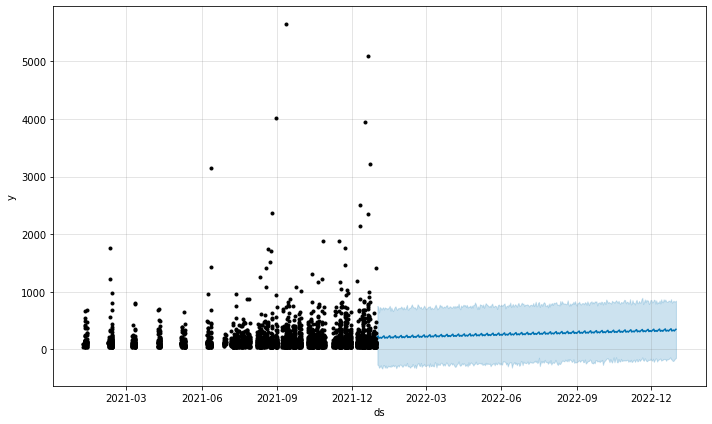

In [61]:
plot = m.plot(forecast)

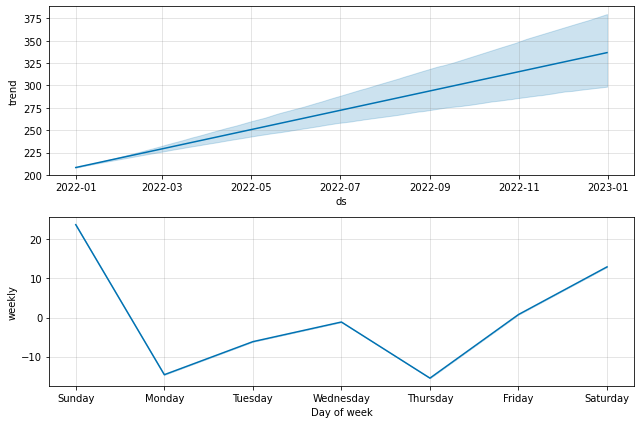

In [62]:
plot2 = m.plot_components(forecast)